In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

### Maths Servers

In [2]:
# import sys
# sys.path.append('/home/links/ct715/eddy_feedback/')
# import functions.eddy_feedback as ef 
# import functions.plotting as plot 
# import functions.data_wrangling as data 
# import functions.aos_functions as aos

# ds1 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/era_int_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})
# ds2 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})
# ds3 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/ncep_ncar_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})

# # data missing at 1000hPa, cut out
# ds1 = ds1.where(ds1.pressure < 1000, drop=True)
# ds2 = ds2.where(ds2.pressure < 1000, drop=True)
# ds3 = ds3.where(ds3.pressure < 1000, drop=True)

### Jasmin Servers

In [3]:
import sys
sys.path.append('/home/users/cturrell/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.plotting as plot 
import functions.data_wrangling as data 
import functions.aos_functions as aos

ds1 = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/srip_datasets/era_int_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds2 = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/srip_datasets/jra55_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds3 = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/srip_datasets/ncep_ncar_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})

# # data missing at 1000hPa, cut out
# ds1 = ds1.where(ds1.pressure < 1000, drop=True)
# ds2 = ds2.where(ds2.pressure < 1000, drop=True)
# ds3 = ds3.where(ds3.pressure < 1000, drop=True)

# data missing at 1000hPa, cut out
ds1 = ds1.interp( latitude = np.arange(-90, 93, 3))
ds2 = ds2.interp( latitude = np.arange(-90, 93, 3))
ds3 = ds3.interp( latitude = np.arange(-90, 93, 3))

In [4]:
ds1

<xarray.Dataset>
Dimensions:   (time: 456, pressure: 22, latitude: 61)
Coordinates:
  * time      (time) datetime64[ns] 1979-01-14T09:00:00 ... 2016-12-14T09:00:00
  * pressure  (pressure) float32 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) int64 -90 -87 -84 -81 -78 -75 -72 ... 75 78 81 84 87 90
Data variables:
    ubar      (time, pressure, latitude) float32 dask.array<chunksize=(31, 22, 61), meta=np.ndarray>
    div1_pr   (time, pressure, latitude) float32 dask.array<chunksize=(31, 22, 61), meta=np.ndarray>
    div1_qg   (time, pressure, latitude) float32 dask.array<chunksize=(31, 22, 61), meta=np.ndarray>

The ERA Interim NH Winter EFP = 0.4671


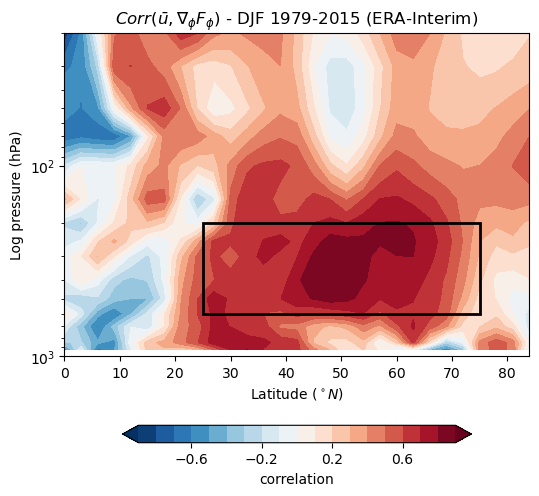

In [5]:
efp_era = ef.calculate_efp(ds1)
print(f'The ERA Interim NH Winter EFP = {efp_era}')

plot.plot_reanalysis_correlation(ds1, top_atmos=20., cut_poles=True,
                                 label='DJF 1979-2015 (ERA-Interim)')

The JRA55 (SRIP) NH Winter EFP = 0.4629


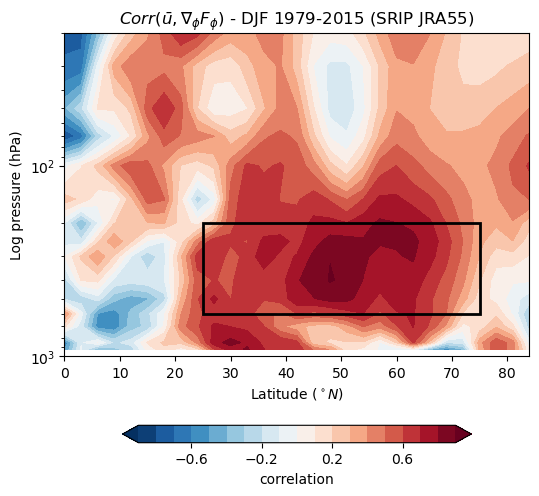

In [6]:
efp_jra = ef.calculate_efp(ds2)
print(f'The JRA55 (SRIP) NH Winter EFP = {efp_jra}')

plot.plot_reanalysis_correlation(ds2, top_atmos=20., cut_poles=True,
                                 label='DJF 1979-2015 (SRIP JRA55)')

The NCEP-NCAR NH Winter EFP = 0.4524


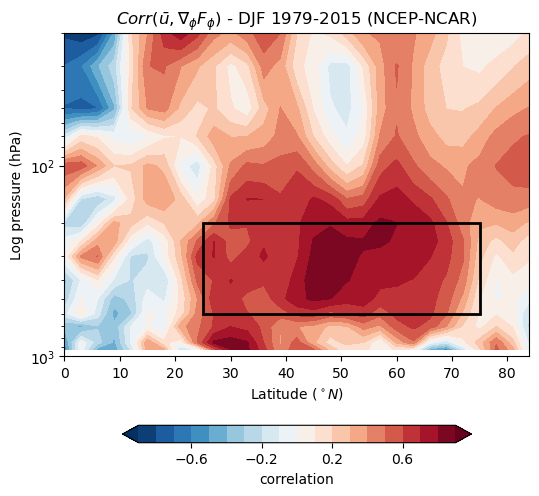

In [7]:
efp_ncep = ef.calculate_efp(ds3)
print(f'The NCEP-NCAR NH Winter EFP = {efp_ncep}')

plot.plot_reanalysis_correlation(ds3, top_atmos=20., cut_poles=True,
                                 label='DJF 1979-2015 (NCEP-NCAR)')

In [8]:
# jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/seasonal/jra55_seasonal-djf_uvtw_ubar_ep-pr.nc') 
jra = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/jra55_daily/jra55_monthly_ubar_div1.nc')
jra

<xarray.Dataset>
Dimensions:  (time: 708, level: 37, lat: 73)
Coordinates:
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2016-12-01
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(708, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(708, 37, 73), meta=np.ndarray>

The JRA55 (me) NH Winter EFP = 0.3996


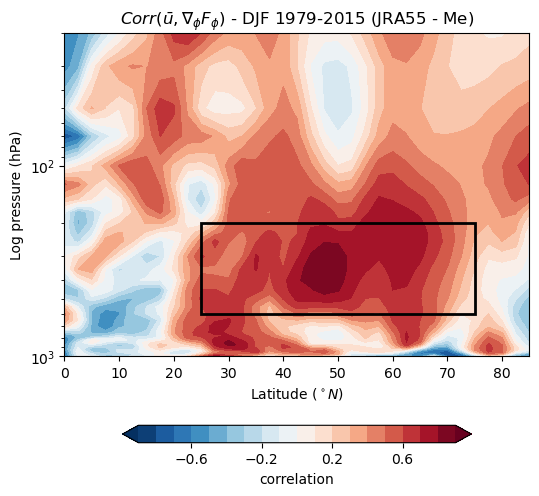

In [9]:
efp_jra55_me = ef.calculate_efp(jra, which_div1='div1', take_level_mean=True)
print(f'The JRA55 (me) NH Winter EFP = {efp_jra55_me}')

plot.plot_reanalysis_correlation(jra, which_div1='div1', cut_poles=True, top_atmos=20.,
                                 label='DJF 1979-2015 (JRA55 - Me)')

## Southern Hemisphere

/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


The ERA Interim SH Winter EFP = 0.32


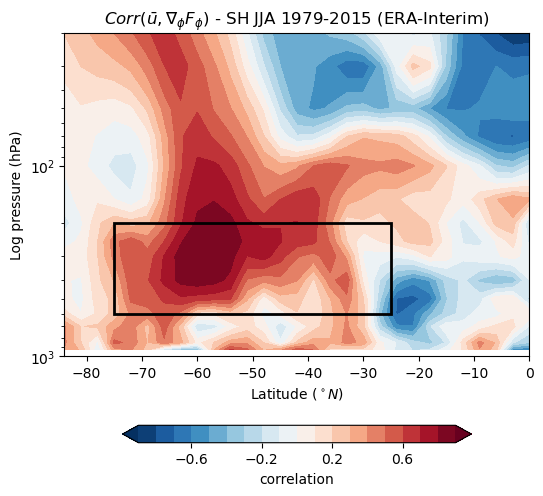

In [10]:
efp_eraSH = ef.calculate_efp(ds1, calc_south_hemis=True)
print(f'The ERA Interim SH Winter EFP = {efp_eraSH}')

plot.plot_reanalysis_correlation(ds1, top_atmos=20., cut_poles=True,
                                 label='SH JJA 1979-2015 (ERA-Interim)', latitude='SH')

/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


The JRA55 (SRIP) SH Winter EFP = 0.3111


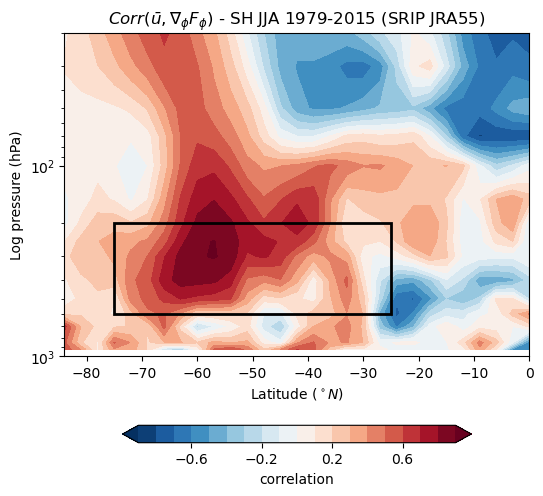

In [11]:
efp_jraSH = ef.calculate_efp(ds2, calc_south_hemis=True)
print(f'The JRA55 (SRIP) SH Winter EFP = {efp_jraSH}')

plot.plot_reanalysis_correlation(ds2, top_atmos=20., cut_poles=True,
                                 label='SH JJA 1979-2015 (SRIP JRA55)', latitude='SH')

/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


The NCEP-NCAR SH Winter EFP = 0.2453


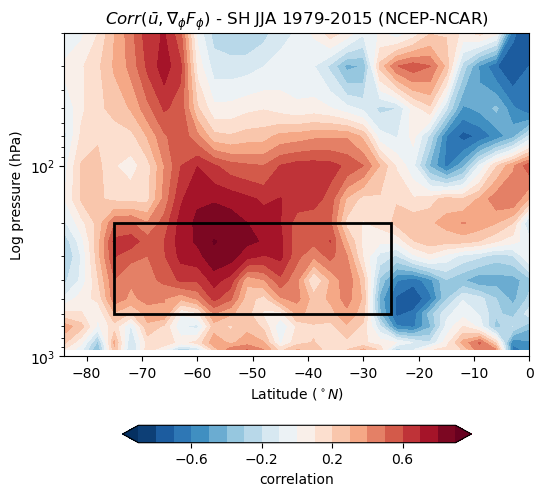

In [12]:
efp_ncepSH = ef.calculate_efp(ds3, calc_south_hemis=True)
print(f'The NCEP-NCAR SH Winter EFP = {efp_ncepSH}')

plot.plot_reanalysis_correlation(ds3, top_atmos=20., cut_poles=True,
                                 label='SH JJA 1979-2015 (NCEP-NCAR)', latitude='SH')

The JRA55 (me) NH Winter EFP = 0.1949


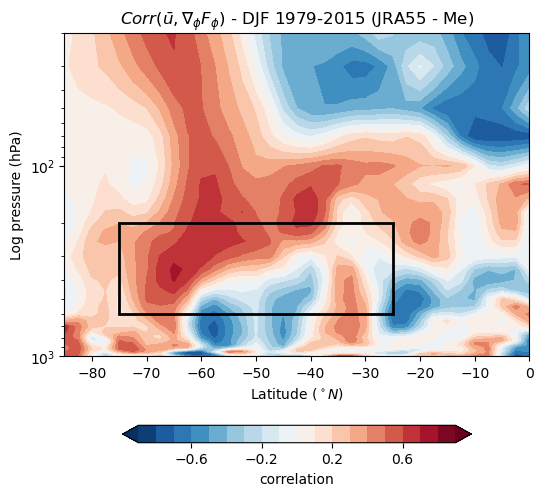

In [13]:
efp_jra55SH_me = ef.calculate_efp(jra, which_div1='div1', calc_south_hemis=True)
print(f'The JRA55 (me) NH Winter EFP = {efp_jra55SH_me}')

plot.plot_reanalysis_correlation(jra, which_div1='div1', cut_poles=True, top_atmos=20.,
                                 label='DJF 1979-2015 (JRA55 - Me)', latitude='SH')

# Rosie's results

In [14]:
import pandas as pd

obs_list = ['ERA_Interim', 'JRA55', 'NCEP']
eddy_feedback_obs_djf = [0.48174943077125576, 0.47615171058090211, 0.46578559112049395]
eddy_feedback_obs_jas = [0.32656466388973926, 0.31630363872178591, 0.21588990177945316]

# Create DataFrame
dataa = {'Reanalysis': obs_list, 'DJF': eddy_feedback_obs_djf, 'JAS': eddy_feedback_obs_jas}
df = pd.DataFrame(dataa)

df

,Reanalysis,DJF,JAS
0,ERA_Interim,0.481749,0.326565
1,JRA55,0.476152,0.316304
2,NCEP,0.465786,0.215890


In [15]:
my_obs_list = ['ERA_Interim', 'JRA55', 'NCEP', 'JRA55 (me)']
my_efp_djf = [efp_era, efp_jra, efp_ncep, efp_jra55_me]
my_efp_jas = [efp_eraSH, efp_jraSH, efp_ncepSH, efp_jra55SH_me]

dataa = {'Reanalysis': my_obs_list, 'DJF': my_efp_djf, 'JAS': my_efp_jas}
df = pd.DataFrame(dataa)

df

,Reanalysis,DJF,JAS
0,ERA_Interim,0.4671,0.3200
1,JRA55,0.4629,0.3111
2,NCEP,0.4524,0.2453
3,JRA55 (me),0.3996,0.1949


# Testing units

In [16]:
# srip jra55 dataset
ds2

<xarray.Dataset>
Dimensions:   (time: 708, pressure: 22, latitude: 61)
Coordinates:
  * time      (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T09:00:00
  * pressure  (pressure) float32 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) int64 -90 -87 -84 -81 -78 -75 -72 ... 75 78 81 84 87 90
Data variables:
    ubar      (time, pressure, latitude) float32 dask.array<chunksize=(31, 22, 61), meta=np.ndarray>
    div1_pr   (time, pressure, latitude) float32 dask.array<chunksize=(31, 22, 61), meta=np.ndarray>
    div1_qg   (time, pressure, latitude) float32 dask.array<chunksize=(31, 22, 61), meta=np.ndarray>

In [17]:
# jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/seasonal/jra55_seasonal-djf_uvtw_ubar_ep-pr.nc') 
jra = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/jra55_daily/jra55_monthly_ubar_div1.nc')

# jra['div1'] = jra['div1'] / 86400
# jra = jra.sel(level=ds2.pressure.values)

# R = 6714e6 * np.cos( (np.deg2rad(jra.lat)) )
# jra['div1'] =  jra['div1'] * R

jra

<xarray.Dataset>
Dimensions:  (time: 708, level: 37, lat: 73)
Coordinates:
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2016-12-01
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(708, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(708, 37, 73), meta=np.ndarray>

The JRA55 (me) NH Winter EFP = 0.3996


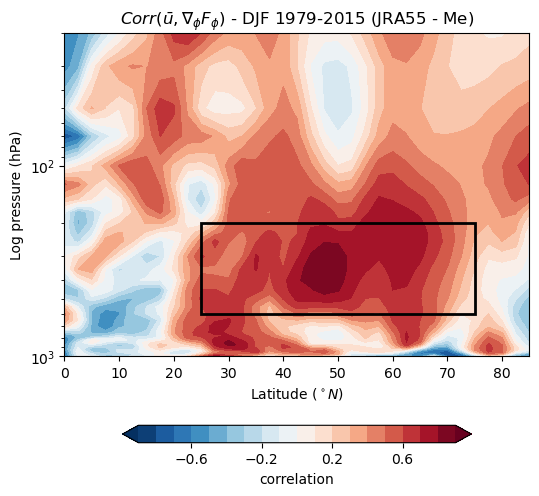

In [18]:
efp_jra55_me = ef.calculate_efp(jra, which_div1='div1', take_level_mean=True)
print(f'The JRA55 (me) NH Winter EFP = {efp_jra55_me}')

plot.plot_reanalysis_correlation(jra, which_div1='div1', cut_poles=True, top_atmos=20.,
                                 label='DJF 1979-2015 (JRA55 - Me)')

The JRA55 (me) NH Winter EFP = 0.1949


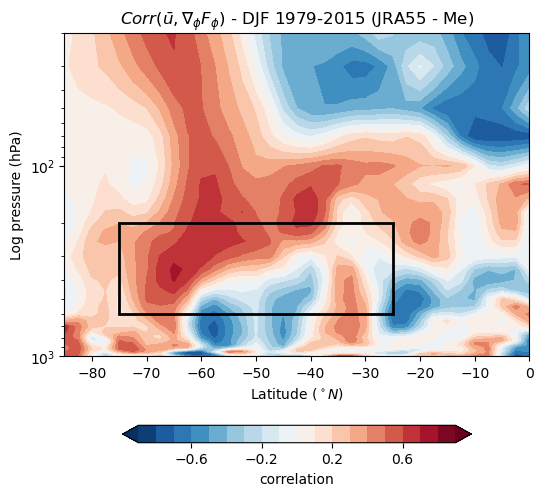

In [19]:
efp_jra55SH_me = ef.calculate_efp(jra, which_div1='div1', calc_south_hemis=True)
print(f'The JRA55 (me) NH Winter EFP = {efp_jra55SH_me}')

plot.plot_reanalysis_correlation(jra, which_div1='div1', cut_poles=True, top_atmos=20.,
                                 label='DJF 1979-2015 (JRA55 - Me)', latitude='SH')

# Missing data

In [20]:
ds1 = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/srip_datasets/era_int_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds2 = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/srip_datasets/jra55_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds3 = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/srip_datasets/ncep_ncar_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})

ds1

<xarray.Dataset>
Dimensions:   (time: 456, pressure: 22, latitude: 73)
Coordinates:
  * time      (time) datetime64[ns] 1979-01-14T09:00:00 ... 2016-12-14T09:00:00
  * pressure  (pressure) float32 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
Data variables:
    ubar      (time, pressure, latitude) float32 dask.array<chunksize=(31, 22, 73), meta=np.ndarray>
    div1_pr   (time, pressure, latitude) float32 dask.array<chunksize=(31, 22, 73), meta=np.ndarray>
    div1_qg   (time, pressure, latitude) float32 dask.array<chunksize=(31, 22, 73), meta=np.ndarray>

### ERA_Interim div1

ubar NaNs: False
div1 NaNs: True




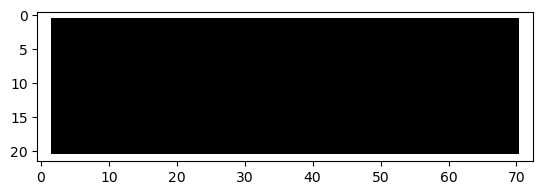

In [21]:
# take DJF mean
ds1 = data.seasonal_mean(ds1)

print(f'ubar NaNs: {np.any(np.isnan(ds1.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(ds1.div1_pr.values))}')
print('\n')

# find NaNs
is_nan_ds1 = np.isnan(ds1.div1_pr)
is_nan_ds1 = is_nan_ds1.mean('time')

# plot missing values
plt.imshow(is_nan_ds1.values, cmap='gray')
plt.show()

### JRA55 SRIP div1

ubar NaNs: False
div1 NaNs: True




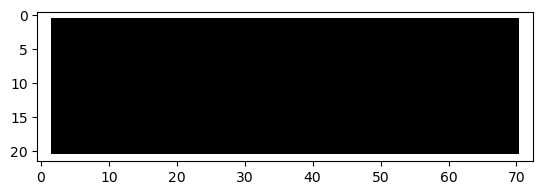

In [22]:
# take DJF mean
ds2 = data.seasonal_mean(ds2)

print(f'ubar NaNs: {np.any(np.isnan(ds2.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(ds2.div1_pr.values))}')
print('\n')

# find NaNs
is_nan_ds2 = np.isnan(ds2.div1_pr)
is_nan_ds2 = is_nan_ds2.mean('time')

# plot missing values
plt.imshow(is_nan_ds2.values, cmap='gray')
plt.show()

### NCEP-NCAR div1

ubar NaNs: True
div1 NaNs: True




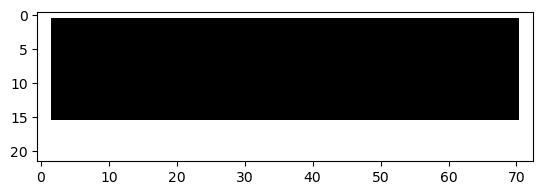

In [23]:
# take DJF mean
ds3 = data.seasonal_mean(ds3)

print(f'ubar NaNs: {np.any(np.isnan(ds3.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(ds3.div1_pr.values))}')
print('\n')

# find NaNs
is_nan_ds3 = np.isnan(ds3.div1_pr)
is_nan_ds3 = is_nan_ds3.mean('time')

# plot missing values
plt.imshow(is_nan_ds3.values, cmap='gray')
plt.show()

### NCEP-NCAR ubar

ubar NaNs: True
div1 NaNs: True




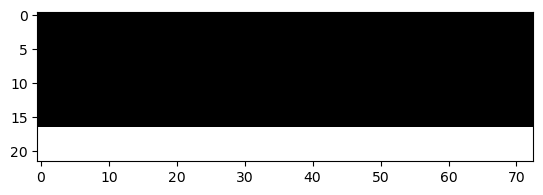

In [24]:
# take DJF mean
ds3 = data.seasonal_mean(ds3)

print(f'ubar NaNs: {np.any(np.isnan(ds3.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(ds3.div1_pr.values))}')
print('\n')

# find NaNs
is_nan_ds3 = np.isnan(ds3.ubar)
is_nan_ds3 = is_nan_ds3.mean('time')

# plot missing values
plt.imshow(is_nan_ds3.values, cmap='gray')
plt.show()

### JRA55 (me) div1

ubar NaNs: False
div1 NaNs: False




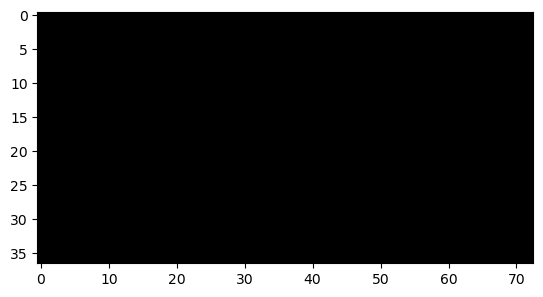

In [25]:
# take DJF mean
jra = data.seasonal_mean(jra)

print(f'ubar NaNs: {np.any(np.isnan(jra.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(jra.div1.values))}')
print('\n')

# find NaNs
is_nan_jra = np.isnan(jra.div1)
is_nan_jra = is_nan_jra.mean('time')

# plot missing values
plt.imshow(is_nan_jra.values, cmap='gray')
plt.show()